In [1]:
import pandas as pd
%matplotlib inline
#GRO import
GRO = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
index = GRO[GRO['Recovery?'] != 1].index
rec = GRO.drop(index, inplace=False)
rec = rec.groupby(["Country"], as_index=False).sum()
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])

index2 = GRO[GRO['Clean archetype?'] != 1].index
greenrec = GRO.drop(index2, inplace=False)
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])

In [2]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge = merge.round({"Percent" : 2})
merge = merge[['Country', 'Green recovery spending', 'Percent']]
merge

,Country,Green recovery spending,Percent
0,Argentina,0.00,0.00
1,Australia,2.30,1.76
2,Austria,0.38,23.75
3,Bangladesh,0.55,87.30
4,Brazil,0.28,51.85
5,Burkina Faso,0.00,NaN
6,Canada,21.67,55.99
7,Chile,0.45,14.38
8,China,51.88,12.14
9,Colombia,0.15,46.88


In [3]:
#renewable energy consumption import
df = pd.read_excel(r'C:\Users\ebloom\Desktop\IRENA.xlsx',
                  na_values=["0", ".."])
df = df[df['Year'] == 2018]
df = df[df['Technology/source'] == 'GrandTotal']
df = df[df['Category'] == 'Final Consumption-Total']
df = df.round(2)
df.loc[df['Country']=='United States of America']
df.at[11368, 'Country'] = 'United States'
GROmerge = merge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge = GROmerge[['Country', 'Percent', 'Green recovery spending', 'TJ']]
GROmerge.rename(columns = {"TJ" : "Renewable energy consumption (TJ)"}, inplace=True)
GROmerge

,Country,Percent,Green recovery spending,Renewable energy consumption (TJ)
0,Argentina,0.00,0.00,267341.51
1,Australia,1.76,2.30,NaN
2,Austria,23.75,0.38,371003.09
3,Bangladesh,87.30,0.55,NaN
4,Brazil,51.85,0.28,3406346.36
5,Burkina Faso,NaN,0.00,NaN
6,Canada,55.99,21.67,NaN
7,Chile,14.38,0.45,295176.56
8,China,12.14,51.88,10399138.67
9,Colombia,46.88,0.15,405234.43


In [4]:
import pycountry
#deforestation import
df = pd.read_csv(r'C:\Users\ebloom\Desktop\Global_Annual_Treecover_Loss.csv', usecols={"iso", "umd_tree_cover_loss__year", "umd_tree_cover_loss__ha"},
                  na_values=["0", ".."])
df.rename(columns = {"umd_tree_cover_loss__year" : "Year", "umd_tree_cover_loss__ha" : "Tree Cover Loss (ha)"}, inplace=True)
df = df.round({'Tree Cover Loss (ha)' : 2})
df = pd.pivot_table(df, values='Tree Cover Loss (ha)', index=['iso'], columns=['Year'])
df.rename(columns={2018 : '2018', 2019 : '2019'},inplace=True)
df = df[['2018', '2019']]

countries = {}
for country in pycountry.countries:
    countries[country.alpha_3] = country.name
##print(countries)
df['Country'] = [countries.get(code) for code in df.index]
df.at['VNM', 'Country'] = "Vietnam"
df.at['KOR', 'Country'] = "South Korea"
df

Year,2018,2019,Country
iso,,,
ABW,0.30,NaN,Aruba
AFG,25.71,17.12,Afghanistan
AGO,242552.50,175098.37,Angola
AIA,0.22,NaN,Anguilla
ALA,619.71,2361.29,Åland Islands
...,...,...,...
XKO,593.89,697.40,None
XNC,17.55,12.56,None
ZAF,63666.75,76139.76,South Africa


In [5]:
GROmerge = GROmerge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge.rename(columns = {"2019" : "Annual tree cover loss (ha)"}, inplace=True)
GROmerge = GROmerge[['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)']]
#GROmerge = GROmerge.drop(columns={'2018'})
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha)
0,Argentina,0.00,0.00,267341.51,145444.27
1,Australia,2.30,1.76,NaN,1661547.60
2,Austria,0.38,23.75,371003.09,33642.43
3,Bangladesh,0.55,87.30,NaN,22078.76
4,Brazil,0.28,51.85,3406346.36,2696748.80
5,Burkina Faso,0.00,NaN,NaN,NaN
6,Canada,21.67,55.99,NaN,2175715.83
7,Chile,0.45,14.38,295176.56,78735.47
8,China,51.88,12.14,10399138.67,496972.44
9,Colombia,0.15,46.88,405234.43,268409.88


In [6]:
#natural resource rents import

nr = pd.read_excel(r'C:\Users\ebloom\Desktop\Data_Extract_From_Adjusted_Net_Savings.xlsx',
                   usecols=["Country Name", "Country Code", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]"],
                  na_values=["0", ".."])
nr.rename(columns = {"2017 [YR2017]" : "2017", "2018 [YR2018]" : "2018", "2019 [YR2019]" : "2019"}, inplace=True)
nr = nr.round({'2017' : 2, '2018' : 2, '2019' : 2})
nr = nr.drop(nr.index[264:269])
nr = nr.drop(nr.index[0:47])
nr.at[152, 'Country Name'] = "South Korea"
nr

,Country Name,Country Code,2017,2018,2019
47,Aruba,ABW,0.00,NaN,NaN
48,Afghanistan,AFG,0.70,0.92,0.77
49,Angola,AGO,16.45,27.43,26.19
50,Albania,ALB,1.36,1.82,1.59
51,Andorra,AND,NaN,NaN,NaN
...,...,...,...,...,...
259,Kosovo,XKX,0.55,0.55,0.40
260,"Yemen, Rep.",YEM,2.00,4.44,5.44
261,South Africa,ZAF,3.64,3.60,3.94
262,Zambia,ZMB,13.30,11.31,6.43


In [7]:
GROmerge = GROmerge.merge(nr, how='left', left_on='Country', right_on='Country Name')
GROmerge = GROmerge[['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)', '2019', 'Country Code']]
GROmerge.rename(columns = {"2019" : "Natural resource rents as % GDP"}, inplace=True)
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Country Code
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,ARG
1,Australia,2.30,1.76,NaN,1661547.60,5.36,AUS
2,Austria,0.38,23.75,371003.09,33642.43,0.13,AUT
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,BGD
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,BRA
5,Burkina Faso,0.00,NaN,NaN,NaN,4.19,BFA
6,Canada,21.67,55.99,NaN,2175715.83,1.90,CAN
7,Chile,0.45,14.38,295176.56,78735.47,2.30,CHL
8,China,51.88,12.14,10399138.67,496972.44,1.26,CHN
9,Colombia,0.15,46.88,405234.43,268409.88,4.52,COL


In [8]:
#fossil fuel subs import
df = pd.read_excel(r'C:\Users\ebloom\Desktop\FossilFuelSubsidiesTracker.xlsx', sheet_name='fulldata',
                  na_values=["0.00", ".."])
df = df[df['Year'] == 2019]
df = df.groupby(['Country']).sum()
df = df.drop(columns={'Year'})
df['% share of GDP'] = df['% share of GDP'] * 100
df = df.round(2)
df = df.reset_index()
df

,Country,% share of GDP,USD nominal per Capita
0,Algeria,7.72,304.63
1,Angola,1.13,33.55
2,Argentina,1.15,115.00
3,Armenia,0.03,1.60
4,Australia,0.52,284.86
...,...,...,...
76,United Kingdom,0.54,228.02
77,United States,0.04,24.94
78,Uzbekistan,7.63,134.07
79,Venezuela,0.00,448.04


In [9]:
df[df['Country'] == 'Korea']
df.at[42, 'Country'] = "South Korea"
df[df['Country'] == 'Viet Nam']
df.at[80, 'Country'] = "Vietnam"
df[df['Country'] == "People's Republic of China"]
df.at[57, 'Country'] = "China"

In [10]:
GROmerge = GROmerge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge.rename(columns = {"% share of GDP" : "Fossil fuel subsidies as % GDP", "USD nominal per Capita": "Fossil fuel subsidies USD per Capita"}, inplace=True)
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Country Code,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,ARG,1.15,115.00
1,Australia,2.30,1.76,NaN,1661547.60,5.36,AUS,0.52,284.86
2,Austria,0.38,23.75,371003.09,33642.43,0.13,AUT,0.19,95.99
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,BGD,0.56,10.37
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,BRA,0.46,40.21
5,Burkina Faso,0.00,NaN,NaN,NaN,4.19,BFA,NaN,NaN
6,Canada,21.67,55.99,NaN,2175715.83,1.90,CAN,0.13,60.34
7,Chile,0.45,14.38,295176.56,78735.47,2.30,CHL,0.43,64.12
8,China,51.88,12.14,10399138.67,496972.44,1.26,CHN,0.33,32.53
9,Colombia,0.15,46.88,405234.43,268409.88,4.52,COL,0.41,26.58


In [11]:
#CO2 data import

df = pd.read_excel('https://iea.blob.core.windows.net/assets/6296011e-4fed-40c3-95a0-1367a4c4484a/CO2Highlights2020.xls',
                   'CO2-POP', header=21, usecols=[0, 47, 48, 49], na_values='..')
df.columns = df.columns.astype(str)
df = df.round({'2017' : 2, '2018' : 2, '2019' : 2})
df = df[df['Region/Country/Economy'].str.contains('OECD')==False]
df = df.drop(df.index[169:172])
df = df.sort_values('Region/Country/Economy', ascending=True)
df.reset_index(drop=True, inplace=True)
df

,Region/Country/Economy,2017,2018,2019
0,Africa,0.97,0.98,NaN
1,Africa,0.97,0.98,NaN
2,Albania,1.51,1.50,NaN
3,Algeria,3.15,3.25,NaN
4,Americas,6.93,7.02,NaN
...,...,...,...,...
158,Venezuela,4.20,3.90,NaN
159,Viet Nam,2.02,2.37,NaN
160,Yemen,0.31,0.28,NaN
161,Zambia,0.35,0.39,NaN


In [12]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
df['Code'] = [countries.get(country) for country in df['Region/Country/Economy']]
df

,Region/Country/Economy,2017,2018,2019,Code
0,Africa,0.97,0.98,NaN,None
1,Africa,0.97,0.98,NaN,None
2,Albania,1.51,1.50,NaN,ALB
3,Algeria,3.15,3.25,NaN,DZA
4,Americas,6.93,7.02,NaN,None
...,...,...,...,...,...
158,Venezuela,4.20,3.90,NaN,None
159,Viet Nam,2.02,2.37,NaN,VNM
160,Yemen,0.31,0.28,NaN,YEM
161,Zambia,0.35,0.39,NaN,ZMB


In [13]:
df.at[18, 'Code'] = 'BOL'
df.at[29, 'Code'] = 'TWN'
df.at[37, 'Code'] = 'CZE'
df.at[40, 'Code'] = 'COD'
df.at[76, 'Code'] = 'IRN'
df.at[84, 'Code'] = 'KOR'
df.at[119, 'Code'] = 'CHN'
df.at[125, 'Code'] = 'MDA'
df.at[133, 'Code'] = 'SVK'
df.at[143, 'Code'] = 'SYR'
df.at[154, 'Code'] = 'TZA'
df.at[158, 'Code'] = 'VEN'

In [14]:
df = df.dropna(subset=['Code'])
df = df.rename(columns={'Region/Country/Economy' : 'Country'})
df.at[84, 'Country'] = 'South Korea'
df.at[119, 'Country'] = 'China'
df.at[159, 'Country'] = 'Vietnam'
df

,Country,2017,2018,2019,Code
2,Albania,1.51,1.50,NaN,ALB
3,Algeria,3.15,3.25,NaN,DZA
5,Angola,0.63,0.61,NaN,AGO
6,Argentina,3.95,3.85,NaN,ARG
7,Armenia,1.75,1.83,NaN,ARM
...,...,...,...,...,...
158,Venezuela,4.20,3.90,NaN,VEN
159,Vietnam,2.02,2.37,NaN,VNM
160,Yemen,0.31,0.28,NaN,YEM
161,Zambia,0.35,0.39,NaN,ZMB


In [15]:
GROmerge = GROmerge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge.rename(columns = {"2018" : "CO2 emissions tons per capita"}, inplace=True)
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Country Code,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,2017,CO2 emissions tons per capita,2019,Code
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,ARG,1.15,115.00,3.95,3.85,NaN,ARG
1,Australia,2.30,1.76,NaN,1661547.60,5.36,AUS,0.52,284.86,15.60,15.32,15.32,AUS
2,Austria,0.38,23.75,371003.09,33642.43,0.13,AUT,0.19,95.99,7.29,6.96,7.07,AUT
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,BGD,0.56,10.37,0.49,0.51,NaN,BGD
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,BRA,0.46,40.21,2.06,1.94,NaN,BRA
5,Burkina Faso,0.00,NaN,NaN,NaN,4.19,BFA,NaN,NaN,NaN,NaN,NaN,NaN
6,Canada,21.67,55.99,NaN,2175715.83,1.90,CAN,0.13,60.34,15.14,15.25,15.21,CAN
7,Chile,0.45,14.38,295176.56,78735.47,2.30,CHL,0.43,64.12,4.65,4.57,4.95,CHL
8,China,51.88,12.14,10399138.67,496972.44,1.26,CHN,0.33,32.53,6.67,6.84,NaN,CHN
9,Colombia,0.15,46.88,405234.43,268409.88,4.52,COL,0.41,26.58,1.42,1.47,NaN,COL


In [16]:
GROmerge = GROmerge[['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Country Code']]
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Country Code
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,ARG
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,AUS
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,AUT
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,BGD
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,BRA
5,Burkina Faso,0.00,NaN,NaN,NaN,4.19,NaN,NaN,NaN,BFA
6,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,CAN
7,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,CHL
8,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,CHN
9,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,COL


In [17]:
# air pollution import

df = pd.read_excel(r'C:\Users\ebloom\Desktop\AAP.xlsx', sheet_name='latest availble PM25 (measured)', header=2,
                  na_values=["0", ".."])
df = df[df['Database version (year)'] == 2018]
df = df.drop(columns={'Region', 'Annual mean, ug/m3', 'note on converted PM10', 'Temporal coverage', 'status'})
df.loc[(df.iso3=='KOR', 'Country')] = 'South Korea'
df.loc[(df.iso3=='USA', 'Country')] = 'United States'
df.loc[(df.iso3=='VNM'), 'Country'] = 'Vietnam'
df = df[['iso3', 'Country', 'City/Town', 'Annual mean, ug/m3.1']]
df

,iso3,Country,City/Town,"Annual mean, ug/m3.1"
1,ALB,Albania,Vrith,13
2,AND,Andorra,Escaldes-Engordany,10
3,AUS,Australia,Adelaide,7
4,AUS,Australia,Brisbane,7
5,AUS,Australia,Bunbury,8
...,...,...,...,...
2583,USA,United States,York,9
2586,USA,United States,Yuba City,8
2587,USA,United States,Yuma,8
2588,VNM,Vietnam,Ha Noi,48


In [18]:
citypop = pd.read_csv(r'C:\Users\ebloom\Desktop\Citypop.csv',
                  na_values=["0", ".."])
citypop = citypop[['Name', 'Country', 'Population']]
citypop = citypop.sort_values(by='Country', ascending=True)
citypop.reset_index(inplace=True, drop=True)
ind = citypop.groupby(['Country'])['Population'].idxmax()
biggest = citypop.loc[ind]
biggest
#find most populous cities for each country in dataset

,Name,Country,Population
0,Kabul,Afghanistan,4335770
4,Tirana,Albania,502734
6,Algiers,Algeria,2809158
15,Luanda,Angola,8631876
24,Buenos Aires,Argentina,15257673
...,...,...,...
1149,Caracas,Venezuela,2945858
1154,Ho Chi Minh City,Vietnam,8837544
1160,Sanaa,Yemen,3075257
1167,Lusaka,Zambia,2905993


In [19]:
#what needs imputing, what should be there but difference in nomenclature
df[df['Country'] == 'Australia']
#Arg not in pollution data
#biggest city Melbourne only 2016 data - needs to be imputed
df[df['Country'] == 'Austria']
df.at[72, 'City/Town'] = 'Vienna'
df[df['Country'] == 'Colombia']
#biggest city Bogota not in data at all - needs to be imputed
df[df['Country'] == 'Dominican Republic']
#DR not in pollution data
#Iraq and Honduras not in at all
df[df['Country'] == 'Ireland']
df.at[1376, 'City/Town'] = 'Dublin'
df[df['City/Town'] == 'Roma']
df.at[1626, 'City/Town'] = 'Rome'
#Kenya and MUS not in data at all
#biggest city in Pakistan not in 2018 data, Karachi only 2016 needs to be imputed
biggest[biggest['Country'] == 'Pakistan']
df[df['City/Town'] == 'Warszawa']
df.at[1907, 'City/Town'] = 'Warsaw'
df[df['City/Town'] == 'New York']
df.at[2393, 'City/Town'] = 'New York City'
#no data for Jamaica at all
df[df['Country'] == 'Jamaica']

,iso3,Country,City/Town,"Annual mean, ug/m3.1"


In [20]:
pop = biggest.merge(df, how='left', left_on='Name', right_on='City/Town')
pop = pop.dropna(subset={'Annual mean, ug/m3.1'})
pop
#pollution in the world's biggest cities

,Name,Country_x,Population,iso3,Country_y,City/Town,"Annual mean, ug/m3.1"
7,Vienna,Austria,1944910,AUT,Austria,Vienna,14.0
9,Manama,Bahrain,663893,BHR,Bahrain,Manama,63.0
10,Dhaka,Bangladesh,21741090,BGD,Bangladesh,Dhaka,57.0
15,Sao Paulo,Brazil,22237472,BRA,Brazil,Sao Paulo,17.0
16,Sofia,Bulgaria,1284311,BGR,Bulgaria,Sofia,25.0
21,Toronto,Canada,6254571,CAN,Canada,Toronto,9.0
24,Santiago,Chile,6811595,CHL,Chile,Santiago,29.0
25,Shanghai,China,27795702,CHN,China,Shanghai,45.0
27,San Jose,Costa Rica,1420533,USA,United States,San Jose,9.0
28,Zagreb,Croatia,684524,HRV,Croatia,Zagreb,21.0


In [21]:
import numpy as np
#Havana, Dublin, New York City
#Kingston, Jamaica should not match Kingston Canada, should be NA
GROmerge = GROmerge.merge(pop, how='left', left_on='Country', right_on='Country_x')
GROmerge = GROmerge.drop([5, 10, 13, 14, 44, 47])
GROmerge.reset_index(drop=True, inplace=True)
GROmerge = GROmerge[['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Annual mean, ug/m3.1', 'Country Code']]
GROmerge.at[21, 'Annual mean, ug/m3.1'] = np.nan
GROmerge.rename(columns = {"Annual mean, ug/m3.1" : "Air pollution (annual mean ug/m3 <PM2.5)"}, inplace=True)
GROmerge
#here is where I could potentially make them into rates

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,NaN,ARG
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,NaN,AUS
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,14.0,AUT
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,57.0,BGD
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,17.0,BRA
5,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,9.0,CAN
6,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,29.0,CHL
7,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,45.0,CHN
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,NaN,COL
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,DNK


In [22]:
#Original row is Argentina, go through all other rows, start with Australia
#Subtract Argentina’s TJ from Australia’s
#Take absolute value
#With list of differences after gone through all columns, take average across them (careful of unit) – becomes Australia’s score
#include green recovery spending cols????
#isolate only numeric columns
diffset = GROmerge[['Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Air pollution (annual mean ug/m3 <PM2.5)']]
#set up
difference = diffset
difference = difference.drop(range(1,42))
for name, value in difference.iteritems():
    difference.at[0, name] = np.nan

#diffresult = diffset.diff(periods=1)
#difference = difference.append(diffresult[diffresult.index == 1], ignore_index=True)
n=1

for index, row in diffset.iterrows():
    diffresult = diffset.diff(periods=n)
    difference = difference.append(diffresult[diffresult.index == n], ignore_index=True)
    n = n+1
    
difference = np.absolute(difference)
#air poll for Arg Nan - does this mean the unknown columns can not factor into NN? all become NA
#normalise data with maximum absolute scaling https://www.geeksforgeeks.org/data-normalization-with-pandas/
difference_norm = difference
for column in difference_norm.columns:
    difference_norm[column] = difference_norm[column]  / difference_norm[column].abs().max()
difference_norm

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.035024,0.0176,NaN,0.594246,0.087199,0.311881,0.915391,1.000000,NaN
2,0.005787,0.2375,0.010231,0.043821,0.051418,0.475248,0.102447,0.271142,NaN
3,0.008375,0.8730,NaN,0.048354,0.042937,0.292079,0.563861,0.291194,NaN
4,0.004264,0.5185,0.309817,1.000000,0.037106,0.341584,0.403050,0.166521,NaN
5,0.329983,0.5599,NaN,0.795778,0.004506,0.504950,0.294568,0.993897,NaN
6,0.006852,0.1438,0.002747,0.026147,0.006096,0.356436,0.274197,0.062772,NaN
7,0.790011,0.1214,1.000000,0.137784,0.021468,0.405941,0.444438,0.260680,NaN
8,0.002284,0.4688,0.013610,0.048197,0.064935,0.366337,0.476504,0.207498,NaN
9,0.125476,0.6200,0.004471,0.053410,0.042142,0.534653,0.398793,0.146469,NaN


In [23]:
difference_norm['Score'] = difference_norm.mean(axis=1)
difference_norm
##difference_norm['Score'].min()
##difference_norm[difference_norm['Score'] == 0.04129648718215812]
##row = GROmerge[GROmerge.index == 30]
##airpoll = row.iloc[0]['Air pollution (annual mean ug/m3 <PM2.5)']
##GROmerge['Air pollution_imputed'] = np.nan
##GROmerge.at[0, 'Air pollution_imputed'] = airpoll
##GROmerge
#Peru closest to Arg
#closest to 0 is nearest neighbour

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.035024,0.0176,NaN,0.594246,0.087199,0.311881,0.915391,1.000000,NaN,0.423049
2,0.005787,0.2375,0.010231,0.043821,0.051418,0.475248,0.102447,0.271142,NaN,0.149699
3,0.008375,0.8730,NaN,0.048354,0.042937,0.292079,0.563861,0.291194,NaN,0.302829
4,0.004264,0.5185,0.309817,1.000000,0.037106,0.341584,0.403050,0.166521,NaN,0.347605
5,0.329983,0.5599,NaN,0.795778,0.004506,0.504950,0.294568,0.993897,NaN,0.497655
6,0.006852,0.1438,0.002747,0.026147,0.006096,0.356436,0.274197,0.062772,NaN,0.109881
7,0.790011,0.1214,1.000000,0.137784,0.021468,0.405941,0.444438,0.260680,NaN,0.397715
8,0.002284,0.4688,0.013610,0.048197,0.064935,0.366337,0.476504,0.207498,NaN,0.206021
9,0.125476,0.6200,0.004471,0.053410,0.042142,0.534653,0.398793,0.146469,NaN,0.240677


In [24]:
#again for Australia
diffset = GROmerge[['Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Air pollution (annual mean ug/m3 <PM2.5)']]
#set up
difference = diffset
difference = difference.drop(range(1,42))
for name, value in difference.iteritems():
    difference.at[0, name] = np.nan


In [25]:
n=1
m=2

for index, row in diffset.iterrows():
    diffresult = diffset.diff(periods=n)
    difference = difference.append(diffresult[diffresult.index == m], ignore_index=True)
    n = n+1
    m = m+1
difference

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.92,21.99,NaN,-1627905.17,-5.23,-0.33,-188.87,-8.36,NaN
2,-1.75,85.54,NaN,-1639468.84,-4.91,0.04,-274.49,-14.81,NaN
3,-2.02,50.09,NaN,1035201.20,-1.89,-0.06,-244.65,-13.38,NaN
4,19.37,54.23,NaN,514168.23,-3.46,-0.39,-224.52,-0.07,NaN
5,-1.85,12.62,NaN,-1582812.13,-3.06,-0.09,-220.74,-10.75,NaN
6,49.58,10.38,NaN,-1164575.16,-4.10,-0.19,-252.33,-8.48,NaN
7,-2.15,45.12,NaN,-1393137.72,-0.84,-0.11,-258.28,-13.85,NaN
8,5.94,60.24,NaN,-1652367.27,-4.88,-0.45,-243.86,-9.79,NaN
9,-2.30,-1.76,NaN,-1646616.76,-5.00,NaN,NaN,-13.14,NaN


In [26]:
difference.index = range(1,42)
diffresult = diffset.diff(periods=-1)
difference = difference.append(diffresult[diffresult.index == 0])

In [27]:
difference = np.absolute(difference)
#normalise data with maximum absolute scaling https://www.geeksforgeeks.org/data-normalization-with-pandas/
difference_norm = difference
for column in difference_norm.columns:
    difference_norm[column] = difference_norm[column]  / difference_norm[column].abs().max()
difference_norm

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.030298,0.223840,NaN,0.979752,0.151858,0.124528,0.674512,0.556962,NaN
3,0.027616,0.870725,NaN,0.986712,0.142567,0.015094,0.980286,0.986676,NaN
4,0.031876,0.509874,NaN,0.623034,0.054878,0.022642,0.873719,0.891406,NaN
5,0.305665,0.552015,NaN,0.309451,0.100465,0.147170,0.801829,0.004664,NaN
6,0.029194,0.128461,NaN,0.952613,0.088850,0.033962,0.788329,0.716189,NaN
7,0.782389,0.105660,NaN,0.700898,0.119048,0.071698,0.901146,0.564957,NaN
8,0.033928,0.459283,NaN,0.838458,0.024390,0.041509,0.922396,0.922718,NaN
9,0.093735,0.613192,NaN,0.994475,0.141696,0.169811,0.870897,0.652232,NaN
10,0.036295,0.017915,NaN,0.991014,0.145180,NaN,NaN,0.875416,NaN


In [28]:
difference_norm['Score'] = difference_norm.mean(axis=1)
difference_norm['Score'].min()


0.24595686197296526

In [29]:
difference_norm[difference_norm['Score'] == 0.24595686197296526]
#note: renewable energy cons not even taken into account here

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Score
41,0.119931,0.064129,NaN,0.269851,0.139082,0.181132,0.928253,0.01932,NaN,0.245957


In [30]:
row = GROmerge[GROmerge.index == 41]
airpoll = row.iloc[0]['Air pollution (annual mean ug/m3 <PM2.5)']
renewcons = row.iloc[0]['Renewable energy consumption (TJ)']
GROmerge.at[1, 'Air pollution_imputed'] = airpoll
GROmerge['Renewable energy_imputed'] = np.nan
GROmerge.at[1, 'Renewable energy_imputed'] = renewcons
GROmerge
#USA closest to Aus
#closest to 0 is nearest neighbour

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Air pollution_imputed,Renewable energy_imputed
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,NaN,ARG,NaN,NaN
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,NaN,AUS,7.0,6102219.78
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,14.0,AUT,NaN,NaN
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,57.0,BGD,NaN,NaN
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,17.0,BRA,NaN,NaN
5,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,9.0,CAN,NaN,NaN
6,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,29.0,CHL,NaN,NaN
7,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,45.0,CHN,NaN,NaN
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,NaN,COL,NaN,NaN
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,DNK,NaN,NaN


In [31]:
GROmerge[GROmerge.index == 41]
GROmerge = GROmerge.drop(columns= ['Air pollution_imputed', 'Renewable energy_imputed'])
#what to do when nearest neighbour also has a null in the column you are looking to impute? copy from second closest neighbour?

In [32]:
#normalise columns so that the columns are on same scale
#here, make sure all columns have a mean of 0 and std deviation of 1
#set mean to 0 by finding the mean of a column, and then subtract the column's mean from every value in the column
#set std deviation to 1 by dividing every value in the col by the std deviation

#find numeric cols
diffset = GROmerge[['Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Air pollution (annual mean ug/m3 <PM2.5)']]

normal = (diffset - diffset.mean()) / diffset.std()
normal

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,-0.516317,-0.948075,-0.321682,-0.231317,-0.025134,1.166748,0.232397,-0.309978,NaN
1,-0.391006,-0.889750,NaN,2.131036,0.504294,0.083376,2.204325,2.592426,NaN
2,-0.495613,-0.161011,-0.272090,-0.405523,-0.337320,-0.484104,0.011708,0.476986,-0.363085
3,-0.486351,1.945008,NaN,-0.423541,-0.285825,0.152162,-0.982267,-1.155142,1.321733
4,-0.501061,0.770211,1.180035,3.744059,0.200154,-0.019802,-0.635850,-0.793290,-0.245539
5,0.664329,0.907408,NaN,2.932200,-0.052491,-0.587282,-0.402158,2.574713,-0.558994
6,-0.491799,-0.471529,-0.308366,-0.335260,0.011877,-0.071391,-0.358276,-0.127787,0.224642
7,2.310258,-0.545761,4.525426,0.316425,-0.155480,-0.243355,-0.725008,0.446621,0.851551
8,-0.508144,0.605507,-0.255713,-0.039715,0.369121,-0.105784,-0.794083,-0.912220,NaN
9,-0.067377,1.106577,-0.343355,-0.443639,-0.280998,-0.690460,-0.626679,0.115135,-0.441448


In [33]:
import math
#that is manual example - try k nearest neighbours
#https://www.dataquest.io/blog/k-nearest-neighbors-in-python/

#first, take euclidian distance using function from dataquest based on ED formula
diffset = GROmerge[['Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Air pollution (annual mean ug/m3 <PM2.5)']]

selected_country = GROmerge[GROmerge['Country'] == 'Argentina'].iloc[0]
#for each column, take diff of values in two rows, square them, and then add difference to total (sum squared differences), then square root the sum

def euclidean_distance(x):
    inner_val = 0
    for k in diffset:
        if np.isnan(x[k]):
            inner_val += 0
            #print("x:", x[k])
            #print("selected:", selected_country[k])
            #print("in:", inner_val)
        elif np.isnan(selected_country[k]):
            inner_val += 0
            #print("x:", x[k])
            #print("selected:", selected_country[k])
            #print("in:", inner_val)
        else:
            result = (x[k] - selected_country[k]) ** 2
            inner_val += result
            #print("x:", x[k])
            #print("selected:", selected_country[k])
            #print("res:", result)
            #print("in:", inner_val)
    #print("new row")
    return math.sqrt(inner_val)
#make sure to ignore nan values or the inner val will become nan and reset - both for selected country row and other rows?
#skip cols with nan
arg_distance = GROmerge.apply(euclidean_distance, axis=1)
arg_distance
#Argentinian euclidean distance from all other rows

0     0.000000e+00
1     1.516103e+06
2     1.524643e+05
3     1.233656e+05
4     4.045059e+06
5     2.030272e+06
6     7.228317e+04
7     1.013789e+07
8     1.847566e+05
9     1.435975e+05
10    2.704855e+05
11    2.569196e+05
12    7.175611e+05
13    1.104453e+06
14    1.442890e+05
15    1.981488e+05
16    2.429002e+04
17    2.998989e+05
18    2.546888e+05
19    2.855126e+05
20    6.456028e+05
21    2.965596e+05
22    9.406375e+04
23    1.315521e+05
24    2.641641e+05
25    2.773496e+05
26    1.831368e+05
27    2.444423e+05
28    1.453631e+05
29    2.551941e+05
30    9.334639e+04
31    8.140566e+04
32    9.540632e+04
33    2.569529e+05
34    1.247127e+05
35    3.581609e+05
36    5.074380e+05
37    1.419257e+05
38    1.565061e+04
39    2.464980e+05
40    3.596888e+05
41    6.156701e+06
dtype: float64

In [34]:
from scipy.spatial import distance
##using scipy library now rather than simple function above
#We can use the distance.euclidean function from scipy.spatial, a much faster way to calculate euclidean distance.
normal.fillna(0, inplace=True)
arg_normal = normal[GROmerge['Country'] == 'Argentina']
euc_dist = normal.apply(lambda row: distance.euclidean(row, arg_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
#distances
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[int(second_nearest)]['Country']
winner
#algorithm correct? find nearest neighbour, take the values from that row for those missing in original row
##this way, DR second too, Honduras, Philippines (lots of Nans), all around 0.05 other way too, Italy kind of random, then Peru
##closest for Arg is Mexico in this case, Mexico row 25 was third other way (manual) BUT only one with no Nans, the others had quite a few (DR 10, Peru 30)

'Mexico'

In [35]:
aus_normal = normal[GROmerge['Country'] == 'Australia']
euc_dist = normal.apply(lambda row: distance.euclidean(row, aus_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner
#also US like other way - not anymore now that we have renewable energy cons added for US

'Finland'

In [36]:
bng_normal = normal[GROmerge['Country'] == 'Bangladesh']
euc_dist = normal.apply(lambda row: distance.euclidean(row, bng_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Jamaica'

In [37]:
can_normal = normal[GROmerge['Country'] == 'Canada']
euc_dist = normal.apply(lambda row: distance.euclidean(row, can_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'United States'

In [38]:
col_normal = normal[GROmerge['Country'] == 'Colombia']
euc_dist = normal.apply(lambda row: distance.euclidean(row, col_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Panama'

In [39]:
dr_normal = normal[GROmerge['Country'] == 'Dominican Republic']
euc_dist = normal.apply(lambda row: distance.euclidean(row, dr_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Honduras'

In [40]:
ghana_normal = normal[GROmerge['Country'] == 'Ghana']
euc_dist = normal.apply(lambda row: distance.euclidean(row, ghana_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Thailand'

In [41]:
hon_normal = normal[GROmerge['Country'] == 'Honduras']
euc_dist = normal.apply(lambda row: distance.euclidean(row, hon_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Dominican Republic'

In [42]:
india_normal = normal[GROmerge['Country'] == 'India']
euc_dist = normal.apply(lambda row: distance.euclidean(row, india_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Peru'

In [43]:
irq_normal = normal[GROmerge['Country'] == 'Iraq']
euc_dist = normal.apply(lambda row: distance.euclidean(row, irq_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Mexico'

In [44]:
jamaica_normal = normal[GROmerge['Country'] == 'Jamaica']
euc_dist = normal.apply(lambda row: distance.euclidean(row, jamaica_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Mauritius'

In [45]:
jpn_normal = normal[GROmerge['Country'] == 'Japan']
euc_dist = normal.apply(lambda row: distance.euclidean(row, jpn_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Netherlands'

In [46]:
ken_normal = normal[GROmerge['Country'] == 'Kenya']
euc_dist = normal.apply(lambda row: distance.euclidean(row, ken_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Senegal'

In [47]:
mus_normal = normal[GROmerge['Country'] == 'Mauritius']
euc_dist = normal.apply(lambda row: distance.euclidean(row, mus_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Jamaica'

In [48]:
pakistan_normal = normal[GROmerge['Country'] == 'Pakistan']
euc_dist = normal.apply(lambda row: distance.euclidean(row, pakistan_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Philippines'

In [49]:
panama_normal = normal[GROmerge['Country'] == 'Panama']
euc_dist = normal.apply(lambda row: distance.euclidean(row, panama_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Kenya'

In [50]:
peru_normal = normal[GROmerge['Country'] == 'Peru']
euc_dist = normal.apply(lambda row: distance.euclidean(row, peru_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Philippines'

In [51]:
phil_normal = normal[GROmerge['Country'] == 'Philippines']
euc_dist = normal.apply(lambda row: distance.euclidean(row, phil_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Honduras'

In [52]:
sen_normal = normal[GROmerge['Country'] == 'Senegal']
euc_dist = normal.apply(lambda row: distance.euclidean(row, sen_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Kenya'

In [53]:
kor_normal = normal[GROmerge['Country'] == 'South Korea']
euc_dist = normal.apply(lambda row: distance.euclidean(row, kor_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Germany'

In [54]:
switz_normal = normal[GROmerge['Country'] == 'Switzerland']
euc_dist = normal.apply(lambda row: distance.euclidean(row, switz_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Finland'

In [55]:
thai_normal = normal[GROmerge['Country'] == 'Thailand']
euc_dist = normal.apply(lambda row: distance.euclidean(row, thai_normal), axis=1)
distances = pd.DataFrame(data={"Distance": euc_dist, "Index": euc_dist.index})
distances.sort_values("Distance", inplace=True)
second_nearest = distances.iloc[1]["Index"]
winner = GROmerge.loc[second_nearest]['Country']
winner

'Chile'

In [56]:
#generate score
#set up test and train sets by using random samplings - shuffle the index and pick rows, otherwise predicting and training on the same data - overfit
import random
from numpy.random import permutation

GROmergez = GROmerge.fillna(0, inplace=False)
shuffled = permutation(GROmergez.index)
#no more than 1/3 of countries in a test set, here testfloor is 14
testfloor = math.floor(len(GROmergez)/3)
#take first third of randomly shuffled indices
testset = GROmergez.loc[shuffled[1:testfloor]]
#train set becomes rest of data
trainset = GROmergez.loc[shuffled[testfloor:]]
trainset

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,DNK
16,India,0.82,5.10,0.00,121154.44,2.01,0.94,19.46,1.71,143.0,IND
40,United Kingdom,65.67,16.77,607446.19,28376.64,0.59,0.54,228.02,5.30,12.0,GBR
37,Switzerland,1.57,53.58,0.00,3518.71,0.01,0.35,300.56,4.20,10.0,CHE
26,Netherlands,0.18,0.66,152883.32,2481.33,0.25,0.04,22.88,8.76,13.0,NLD
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,0.0,COL
34,South Korea,53.30,26.80,0.00,20731.60,0.10,0.08,27.23,11.74,26.0,KOR
24,Mauritius,0.01,100.00,3177.45,0.00,0.00,0.00,0.00,3.27,0.0,MUS
20,Italy,0.90,1.53,907225.69,59704.92,0.09,0.48,159.23,5.25,15.0,ITA
5,Canada,21.67,55.99,0.00,2175715.83,1.90,0.13,60.34,15.25,9.0,CAN


In [57]:
#using scikitlearn for k nearest neighbours - does normalisation and finding distance score automatically
#using regressor (continuous data)
#select columns to predict with
xcols = ['Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita']
#select column we want to predict
ycol = ['Air pollution (annual mean ug/m3 <PM2.5)']

from sklearn.neighbors import KNeighborsRegressor
#create k nearest neighbours model, here with 5 closest neighbours (k=5), user defined constant
nearest = KNeighborsRegressor(n_neighbors=5)
#fit the model on the training data
nearest.fit(trainset[xcols], trainset[ycol])
#make point predictions on the test set using the fit model
pp = nearest.predict(testset[xcols])

In [58]:
pp
##we think for the test set, these are the air pollution vals?

array([[24.4],
       [20.4],
       [12.6],
       [53. ],
       [ 7.4],
       [15. ],
       [11.6],
       [20.4],
       [20.4],
       [40.4],
       [20.4],
       [10.6],
       [28.4]])

In [59]:
#https://scikit-learn.org/stable/modules/neighbors.html
actual = testset[ycol]
#compute mean squared error using this formula
#for each row in test set, subtract actual values from predicted values, square the result and then add them together, divide by number of rows in predicted set
#basically finding average squared difference yeah
pp - actual
#error = (((pp - actual) ** 2).sum()) / len(pp)
#error

,Air pollution (annual mean ug/m3 <PM2.5)
22,7.4
17,20.4
11,5.6
38,25.0
4,-9.6
2,1.0
13,-4.4
21,20.4
28,20.4
15,40.4


In [60]:
from sklearn.impute import KNNImputer
#missing values replaced by mean value of 5 nearest neighbours measured by Euc dist as distance metric

#scale values to have values between 0 and 1 using Scikit learn's MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#several key principles there already above
#find numeric cols
diffset = GROmerge[['Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Air pollution (annual mean ug/m3 <PM2.5)']]
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(diffset), columns = diffset.columns)
df
#multivariate approach to imputation now, not just taking average for that column (univariate)

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,0.000000,0.0000,0.025410,0.053933,0.052010,0.354633,0.372493,0.235843,NaN
1,0.035024,0.0176,NaN,0.616130,0.134673,0.153355,0.946907,1.000000,NaN
2,0.005787,0.2375,0.035382,0.012475,0.003266,0.047923,0.308207,0.443038,0.065217
3,0.008375,0.8730,NaN,0.008187,0.011307,0.166134,0.018667,0.013324,0.376812
4,0.004264,0.5185,0.327355,1.000000,0.087186,0.134185,0.119577,0.108594,0.086957
5,0.329983,0.5599,NaN,0.806792,0.047739,0.028754,0.187650,0.995336,0.028986
6,0.006852,0.1438,0.028088,0.029196,0.057789,0.124601,0.200433,0.283811,0.173913
7,0.790011,0.1214,1.000000,0.184286,0.031658,0.092652,0.093605,0.435043,0.289855
8,0.002284,0.4688,0.038674,0.099531,0.113568,0.118211,0.073484,0.077282,NaN
9,0.125476,0.6200,0.021053,0.003404,0.012060,0.009585,0.122248,0.347768,0.050725


In [61]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
#looks for missing values in all columns, uses others to fill them
imputer = KNNImputer(n_neighbors=5)
#fit to data, then transform it
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [62]:
df

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,0.000000,0.0000,0.025410,0.053933,0.052010,0.354633,0.372493,0.235843,0.157971
1,0.035024,0.0176,0.145179,0.616130,0.134673,0.153355,0.946907,1.000000,0.031884
2,0.005787,0.2375,0.035382,0.012475,0.003266,0.047923,0.308207,0.443038,0.065217
3,0.008375,0.8730,0.017846,0.008187,0.011307,0.166134,0.018667,0.013324,0.376812
4,0.004264,0.5185,0.327355,1.000000,0.087186,0.134185,0.119577,0.108594,0.086957
5,0.329983,0.5599,0.219689,0.806792,0.047739,0.028754,0.187650,0.995336,0.028986
6,0.006852,0.1438,0.028088,0.029196,0.057789,0.124601,0.200433,0.283811,0.173913
7,0.790011,0.1214,1.000000,0.184286,0.031658,0.092652,0.093605,0.435043,0.289855
8,0.002284,0.4688,0.038674,0.099531,0.113568,0.118211,0.073484,0.077282,0.343478
9,0.125476,0.6200,0.021053,0.003404,0.012060,0.009585,0.122248,0.347768,0.050725


In [63]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
df = pd.DataFrame(scaler.inverse_transform(df), columns = df.columns)
df

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,0.00,0.00,2.673415e+05,145444.270,2.07,1.150,115.000,3.85,26.8
1,2.30,1.76,1.512457e+06,1661547.600,5.36,0.520,284.860,15.32,9.4
2,0.38,23.75,3.710031e+05,33642.430,0.13,0.190,95.990,6.96,14.0
3,0.55,87.30,1.887063e+05,22078.760,0.45,0.560,10.370,0.51,57.0
4,0.28,51.85,3.406346e+06,2696748.800,3.47,0.460,40.210,1.94,17.0
5,21.67,55.99,2.287058e+06,2175715.830,1.90,0.130,60.340,15.25,9.0
6,0.45,14.38,2.951766e+05,78735.470,2.30,0.430,64.120,4.57,29.0
7,51.88,12.14,1.039914e+07,496972.440,1.26,0.330,32.530,6.84,45.0
8,0.15,46.88,4.052344e+05,268409.880,4.52,0.410,26.580,1.47,52.4
9,8.24,62.00,2.220385e+05,9180.330,0.48,0.070,41.000,5.53,12.0


In [64]:
#put these back onto the GROmerge in new cols under per list

In [65]:
per_list = []

for name, values in GROmerge.iteritems():
    narows = GROmerge[GROmerge[name].isna()]
    ## number of NA rows divided by total no of rows
    narows['Country'].count()
    per_imputed = narows['Country'].count() / GROmerge['Country'].count()
    per_list.append(per_imputed)

per_imp = pd.Series(per_list, index=['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Air pollution (annual mean ug/m3 <PM2.5)', 'Country Code'])
GROmerge = GROmerge.append(per_imp, ignore_index=True)
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code
0,Argentina,0.00,0.00,2.673415e+05,1.454443e+05,2.07,1.150000,115.000000,3.85,NaN,ARG
1,Australia,2.30,1.76,NaN,1.661548e+06,5.36,0.520000,284.860000,15.32,NaN,AUS
2,Austria,0.38,23.75,3.710031e+05,3.364243e+04,0.13,0.190000,95.990000,6.96,14.000000,AUT
3,Bangladesh,0.55,87.30,NaN,2.207876e+04,0.45,0.560000,10.370000,0.51,57.000000,BGD
4,Brazil,0.28,51.85,3.406346e+06,2.696749e+06,3.47,0.460000,40.210000,1.94,17.000000,BRA
5,Canada,21.67,55.99,NaN,2.175716e+06,1.90,0.130000,60.340000,15.25,9.000000,CAN
6,Chile,0.45,14.38,2.951766e+05,7.873547e+04,2.30,0.430000,64.120000,4.57,29.000000,CHL
7,China,51.88,12.14,1.039914e+07,4.969724e+05,1.26,0.330000,32.530000,6.84,45.000000,CHN
8,Colombia,0.15,46.88,4.052344e+05,2.684099e+05,4.52,0.410000,26.580000,1.47,NaN,COL
9,Denmark,8.24,62.00,2.220385e+05,9.180330e+03,0.48,0.070000,41.000000,5.53,12.000000,DNK


In [66]:
cols = list(GROmerge)
cols

['Country',
 'Green recovery spending',
 'Percent',
 'Renewable energy consumption (TJ)',
 'Annual tree cover loss (ha)',
 'Natural resource rents as % GDP',
 'Fossil fuel subsidies as % GDP',
 'Fossil fuel subsidies USD per Capita',
 'CO2 emissions tons per capita',
 'Air pollution (annual mean ug/m3 <PM2.5)',
 'Country Code']

In [67]:
GROmerge['Percent row imputed'] = GROmerge.isnull().sum(axis=1) / (len(cols) - 2)
## subtract 2 to only count numeric cols
GROmerge


,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Percent row imputed
0,Argentina,0.00,0.00,2.673415e+05,1.454443e+05,2.07,1.150000,115.000000,3.85,NaN,ARG,0.111111
1,Australia,2.30,1.76,NaN,1.661548e+06,5.36,0.520000,284.860000,15.32,NaN,AUS,0.222222
2,Austria,0.38,23.75,3.710031e+05,3.364243e+04,0.13,0.190000,95.990000,6.96,14.000000,AUT,0.000000
3,Bangladesh,0.55,87.30,NaN,2.207876e+04,0.45,0.560000,10.370000,0.51,57.000000,BGD,0.111111
4,Brazil,0.28,51.85,3.406346e+06,2.696749e+06,3.47,0.460000,40.210000,1.94,17.000000,BRA,0.000000
5,Canada,21.67,55.99,NaN,2.175716e+06,1.90,0.130000,60.340000,15.25,9.000000,CAN,0.111111
6,Chile,0.45,14.38,2.951766e+05,7.873547e+04,2.30,0.430000,64.120000,4.57,29.000000,CHL,0.000000
7,China,51.88,12.14,1.039914e+07,4.969724e+05,1.26,0.330000,32.530000,6.84,45.000000,CHN,0.000000
8,Colombia,0.15,46.88,4.052344e+05,2.684099e+05,4.52,0.410000,26.580000,1.47,NaN,COL,0.111111
9,Denmark,8.24,62.00,2.220385e+05,9.180330e+03,0.48,0.070000,41.000000,5.53,12.000000,DNK,0.000000


In [68]:
GROmerge['Renewable energy_imputed'] = np.nan

for index, row in GROmerge.iterrows():
    if np.isnan(row['Renewable energy consumption (TJ)']):
        #print(row['Country'])
        GROmerge.at[index, 'Renewable energy_imputed'] = df.iloc[index]['Renewable energy consumption (TJ)']

#def newcol(x):
   #if np.isnan(x['Renewable energy consumption (TJ)']):
        #return df['Renewable energy consumption (TJ)']

#GROmerge['Renewable energy_imputed'] = GROmerge.apply(newcol, axis=1)
#GROmerge['Renewable energy_imputed']

In [69]:
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Percent row imputed,Renewable energy_imputed
0,Argentina,0.00,0.00,2.673415e+05,1.454443e+05,2.07,1.150000,115.000000,3.85,NaN,ARG,0.111111,NaN
1,Australia,2.30,1.76,NaN,1.661548e+06,5.36,0.520000,284.860000,15.32,NaN,AUS,0.222222,1512456.660
2,Austria,0.38,23.75,3.710031e+05,3.364243e+04,0.13,0.190000,95.990000,6.96,14.000000,AUT,0.000000,NaN
3,Bangladesh,0.55,87.30,NaN,2.207876e+04,0.45,0.560000,10.370000,0.51,57.000000,BGD,0.111111,188706.286
4,Brazil,0.28,51.85,3.406346e+06,2.696749e+06,3.47,0.460000,40.210000,1.94,17.000000,BRA,0.000000,NaN
5,Canada,21.67,55.99,NaN,2.175716e+06,1.90,0.130000,60.340000,15.25,9.000000,CAN,0.111111,2287058.332
6,Chile,0.45,14.38,2.951766e+05,7.873547e+04,2.30,0.430000,64.120000,4.57,29.000000,CHL,0.000000,NaN
7,China,51.88,12.14,1.039914e+07,4.969724e+05,1.26,0.330000,32.530000,6.84,45.000000,CHN,0.000000,NaN
8,Colombia,0.15,46.88,4.052344e+05,2.684099e+05,4.52,0.410000,26.580000,1.47,NaN,COL,0.111111,NaN
9,Denmark,8.24,62.00,2.220385e+05,9.180330e+03,0.48,0.070000,41.000000,5.53,12.000000,DNK,0.000000,NaN


In [70]:
GROmerge['Tree cover_imputed'] = np.nan

for index, row in GROmerge.iterrows():
    if np.isnan(row['Annual tree cover loss (ha)']):
        GROmerge.at[index, 'Tree cover_imputed'] = df.iloc[index]['Annual tree cover loss (ha)']


In [71]:
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Percent row imputed,Renewable energy_imputed,Tree cover_imputed
0,Argentina,0.00,0.00,2.673415e+05,1.454443e+05,2.07,1.150000,115.000000,3.85,NaN,ARG,0.111111,NaN,NaN
1,Australia,2.30,1.76,NaN,1.661548e+06,5.36,0.520000,284.860000,15.32,NaN,AUS,0.222222,1512456.660,NaN
2,Austria,0.38,23.75,3.710031e+05,3.364243e+04,0.13,0.190000,95.990000,6.96,14.000000,AUT,0.000000,NaN,NaN
3,Bangladesh,0.55,87.30,NaN,2.207876e+04,0.45,0.560000,10.370000,0.51,57.000000,BGD,0.111111,188706.286,NaN
4,Brazil,0.28,51.85,3.406346e+06,2.696749e+06,3.47,0.460000,40.210000,1.94,17.000000,BRA,0.000000,NaN,NaN
5,Canada,21.67,55.99,NaN,2.175716e+06,1.90,0.130000,60.340000,15.25,9.000000,CAN,0.111111,2287058.332,NaN
6,Chile,0.45,14.38,2.951766e+05,7.873547e+04,2.30,0.430000,64.120000,4.57,29.000000,CHL,0.000000,NaN,NaN
7,China,51.88,12.14,1.039914e+07,4.969724e+05,1.26,0.330000,32.530000,6.84,45.000000,CHN,0.000000,NaN,NaN
8,Colombia,0.15,46.88,4.052344e+05,2.684099e+05,4.52,0.410000,26.580000,1.47,NaN,COL,0.111111,NaN,NaN
9,Denmark,8.24,62.00,2.220385e+05,9.180330e+03,0.48,0.070000,41.000000,5.53,12.000000,DNK,0.000000,NaN,NaN


In [72]:
GROmerge['Fossil fuel GDP_imputed'] = np.nan

for index, row in GROmerge.iterrows():
    if np.isnan(row['Fossil fuel subsidies as % GDP']):
        GROmerge.at[index, 'Fossil fuel GDP_imputed'] = df.iloc[index]['Fossil fuel subsidies as % GDP']
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Percent row imputed,Renewable energy_imputed,Tree cover_imputed,Fossil fuel GDP_imputed
0,Argentina,0.00,0.00,2.673415e+05,1.454443e+05,2.07,1.150000,115.000000,3.85,NaN,ARG,0.111111,NaN,NaN,NaN
1,Australia,2.30,1.76,NaN,1.661548e+06,5.36,0.520000,284.860000,15.32,NaN,AUS,0.222222,1512456.660,NaN,NaN
2,Austria,0.38,23.75,3.710031e+05,3.364243e+04,0.13,0.190000,95.990000,6.96,14.000000,AUT,0.000000,NaN,NaN,NaN
3,Bangladesh,0.55,87.30,NaN,2.207876e+04,0.45,0.560000,10.370000,0.51,57.000000,BGD,0.111111,188706.286,NaN,NaN
4,Brazil,0.28,51.85,3.406346e+06,2.696749e+06,3.47,0.460000,40.210000,1.94,17.000000,BRA,0.000000,NaN,NaN,NaN
5,Canada,21.67,55.99,NaN,2.175716e+06,1.90,0.130000,60.340000,15.25,9.000000,CAN,0.111111,2287058.332,NaN,NaN
6,Chile,0.45,14.38,2.951766e+05,7.873547e+04,2.30,0.430000,64.120000,4.57,29.000000,CHL,0.000000,NaN,NaN,NaN
7,China,51.88,12.14,1.039914e+07,4.969724e+05,1.26,0.330000,32.530000,6.84,45.000000,CHN,0.000000,NaN,NaN,NaN
8,Colombia,0.15,46.88,4.052344e+05,2.684099e+05,4.52,0.410000,26.580000,1.47,NaN,COL,0.111111,NaN,NaN,NaN
9,Denmark,8.24,62.00,2.220385e+05,9.180330e+03,0.48,0.070000,41.000000,5.53,12.000000,DNK,0.000000,NaN,NaN,NaN


In [73]:
GROmerge['Fossil fuel per cap_imputed'] = np.nan
GROmerge['Air pollution_imputed'] = np.nan

for index, row in GROmerge.iterrows():
    if np.isnan(row['Fossil fuel subsidies USD per Capita']):
        GROmerge.at[index, 'Fossil fuel per cap_imputed'] = df.iloc[index]['Fossil fuel subsidies USD per Capita']
    if np.isnan(row['Air pollution (annual mean ug/m3 <PM2.5)']):   
        GROmerge.at[index, 'Air pollution_imputed'] = df.iloc[index]['Air pollution (annual mean ug/m3 <PM2.5)']
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Percent row imputed,Renewable energy_imputed,Tree cover_imputed,Fossil fuel GDP_imputed,Fossil fuel per cap_imputed,Air pollution_imputed
0,Argentina,0.00,0.00,2.673415e+05,1.454443e+05,2.07,1.150000,115.000000,3.85,NaN,ARG,0.111111,NaN,NaN,NaN,NaN,26.8
1,Australia,2.30,1.76,NaN,1.661548e+06,5.36,0.520000,284.860000,15.32,NaN,AUS,0.222222,1512456.660,NaN,NaN,NaN,9.4
2,Austria,0.38,23.75,3.710031e+05,3.364243e+04,0.13,0.190000,95.990000,6.96,14.000000,AUT,0.000000,NaN,NaN,NaN,NaN,NaN
3,Bangladesh,0.55,87.30,NaN,2.207876e+04,0.45,0.560000,10.370000,0.51,57.000000,BGD,0.111111,188706.286,NaN,NaN,NaN,NaN
4,Brazil,0.28,51.85,3.406346e+06,2.696749e+06,3.47,0.460000,40.210000,1.94,17.000000,BRA,0.000000,NaN,NaN,NaN,NaN,NaN
5,Canada,21.67,55.99,NaN,2.175716e+06,1.90,0.130000,60.340000,15.25,9.000000,CAN,0.111111,2287058.332,NaN,NaN,NaN,NaN
6,Chile,0.45,14.38,2.951766e+05,7.873547e+04,2.30,0.430000,64.120000,4.57,29.000000,CHL,0.000000,NaN,NaN,NaN,NaN,NaN
7,China,51.88,12.14,1.039914e+07,4.969724e+05,1.26,0.330000,32.530000,6.84,45.000000,CHN,0.000000,NaN,NaN,NaN,NaN,NaN
8,Colombia,0.15,46.88,4.052344e+05,2.684099e+05,4.52,0.410000,26.580000,1.47,NaN,COL,0.111111,NaN,NaN,NaN,NaN,52.4
9,Denmark,8.24,62.00,2.220385e+05,9.180330e+03,0.48,0.070000,41.000000,5.53,12.000000,DNK,0.000000,NaN,NaN,NaN,NaN,NaN


In [74]:
GROmerge['Renewable_final'] = GROmerge['Renewable energy consumption (TJ)'].fillna(GROmerge['Renewable energy_imputed'])
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Percent row imputed,Renewable energy_imputed,Tree cover_imputed,Fossil fuel GDP_imputed,Fossil fuel per cap_imputed,Air pollution_imputed,Renewable_final
0,Argentina,0.00,0.00,2.673415e+05,1.454443e+05,2.07,1.150000,115.000000,3.85,NaN,ARG,0.111111,NaN,NaN,NaN,NaN,26.8,2.673415e+05
1,Australia,2.30,1.76,NaN,1.661548e+06,5.36,0.520000,284.860000,15.32,NaN,AUS,0.222222,1512456.660,NaN,NaN,NaN,9.4,1.512457e+06
2,Austria,0.38,23.75,3.710031e+05,3.364243e+04,0.13,0.190000,95.990000,6.96,14.000000,AUT,0.000000,NaN,NaN,NaN,NaN,NaN,3.710031e+05
3,Bangladesh,0.55,87.30,NaN,2.207876e+04,0.45,0.560000,10.370000,0.51,57.000000,BGD,0.111111,188706.286,NaN,NaN,NaN,NaN,1.887063e+05
4,Brazil,0.28,51.85,3.406346e+06,2.696749e+06,3.47,0.460000,40.210000,1.94,17.000000,BRA,0.000000,NaN,NaN,NaN,NaN,NaN,3.406346e+06
5,Canada,21.67,55.99,NaN,2.175716e+06,1.90,0.130000,60.340000,15.25,9.000000,CAN,0.111111,2287058.332,NaN,NaN,NaN,NaN,2.287058e+06
6,Chile,0.45,14.38,2.951766e+05,7.873547e+04,2.30,0.430000,64.120000,4.57,29.000000,CHL,0.000000,NaN,NaN,NaN,NaN,NaN,2.951766e+05
7,China,51.88,12.14,1.039914e+07,4.969724e+05,1.26,0.330000,32.530000,6.84,45.000000,CHN,0.000000,NaN,NaN,NaN,NaN,NaN,1.039914e+07
8,Colombia,0.15,46.88,4.052344e+05,2.684099e+05,4.52,0.410000,26.580000,1.47,NaN,COL,0.111111,NaN,NaN,NaN,NaN,52.4,4.052344e+05
9,Denmark,8.24,62.00,2.220385e+05,9.180330e+03,0.48,0.070000,41.000000,5.53,12.000000,DNK,0.000000,NaN,NaN,NaN,NaN,NaN,2.220385e+05


In [75]:
GROmerge['Tree cover_final'] = GROmerge['Annual tree cover loss (ha)'].fillna(GROmerge['Tree cover_imputed'])
GROmerge['Fossil GDP_final'] = GROmerge['Fossil fuel subsidies as % GDP'].fillna(GROmerge['Fossil fuel GDP_imputed'])
GROmerge['Fossil per cap_final'] = GROmerge['Fossil fuel subsidies USD per Capita'].fillna(GROmerge['Fossil fuel per cap_imputed'])
GROmerge['Air poll_final'] = GROmerge['Air pollution (annual mean ug/m3 <PM2.5)'].fillna(GROmerge['Air pollution_imputed'])
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),...,Renewable energy_imputed,Tree cover_imputed,Fossil fuel GDP_imputed,Fossil fuel per cap_imputed,Air pollution_imputed,Renewable_final,Tree cover_final,Fossil GDP_final,Fossil per cap_final,Air poll_final
0,Argentina,0.00,0.00,2.673415e+05,1.454443e+05,2.07,1.150000,115.000000,3.85,NaN,...,NaN,NaN,NaN,NaN,26.8,2.673415e+05,1.454443e+05,1.150000,115.000000,26.800000
1,Australia,2.30,1.76,NaN,1.661548e+06,5.36,0.520000,284.860000,15.32,NaN,...,1512456.660,NaN,NaN,NaN,9.4,1.512457e+06,1.661548e+06,0.520000,284.860000,9.400000
2,Austria,0.38,23.75,3.710031e+05,3.364243e+04,0.13,0.190000,95.990000,6.96,14.000000,...,NaN,NaN,NaN,NaN,NaN,3.710031e+05,3.364243e+04,0.190000,95.990000,14.000000
3,Bangladesh,0.55,87.30,NaN,2.207876e+04,0.45,0.560000,10.370000,0.51,57.000000,...,188706.286,NaN,NaN,NaN,NaN,1.887063e+05,2.207876e+04,0.560000,10.370000,57.000000
4,Brazil,0.28,51.85,3.406346e+06,2.696749e+06,3.47,0.460000,40.210000,1.94,17.000000,...,NaN,NaN,NaN,NaN,NaN,3.406346e+06,2.696749e+06,0.460000,40.210000,17.000000
5,Canada,21.67,55.99,NaN,2.175716e+06,1.90,0.130000,60.340000,15.25,9.000000,...,2287058.332,NaN,NaN,NaN,NaN,2.287058e+06,2.175716e+06,0.130000,60.340000,9.000000
6,Chile,0.45,14.38,2.951766e+05,7.873547e+04,2.30,0.430000,64.120000,4.57,29.000000,...,NaN,NaN,NaN,NaN,NaN,2.951766e+05,7.873547e+04,0.430000,64.120000,29.000000
7,China,51.88,12.14,1.039914e+07,4.969724e+05,1.26,0.330000,32.530000,6.84,45.000000,...,NaN,NaN,NaN,NaN,NaN,1.039914e+07,4.969724e+05,0.330000,32.530000,45.000000
8,Colombia,0.15,46.88,4.052344e+05,2.684099e+05,4.52,0.410000,26.580000,1.47,NaN,...,NaN,NaN,NaN,NaN,52.4,4.052344e+05,2.684099e+05,0.410000,26.580000,52.400000
9,Denmark,8.24,62.00,2.220385e+05,9.180330e+03,0.48,0.070000,41.000000,5.53,12.000000,...,NaN,NaN,NaN,NaN,NaN,2.220385e+05,9.180330e+03,0.070000,41.000000,12.000000


In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(GROmerge[['Tree cover_final', 'Fossil GDP_final', 'Fossil per cap_final', 'Air poll_final',
                    'Renewable_final', 'Natural resource rents as % GDP', 'CO2 emissions tons per capita']], GROmerge['Percent'])

LinearRegression()

In [77]:
# line of best fit calculated and saved into model
#access the parameters in the model (gradient and y intercept)
#model.predict()

GROfinal = GROmerge[['Tree cover_final', 'Fossil GDP_final', 'Fossil per cap_final', 'Air poll_final',
                    'Renewable_final', 'Natural resource rents as % GDP', 'CO2 emissions tons per capita', 'Percent', 'Green recovery spending']]
GROfinal

,Tree cover_final,Fossil GDP_final,Fossil per cap_final,Air poll_final,Renewable_final,Natural resource rents as % GDP,CO2 emissions tons per capita,Percent,Green recovery spending
0,1.454443e+05,1.150000,115.000000,26.800000,2.673415e+05,2.07,3.85,0.00,0.00
1,1.661548e+06,0.520000,284.860000,9.400000,1.512457e+06,5.36,15.32,1.76,2.30
2,3.364243e+04,0.190000,95.990000,14.000000,3.710031e+05,0.13,6.96,23.75,0.38
3,2.207876e+04,0.560000,10.370000,57.000000,1.887063e+05,0.45,0.51,87.30,0.55
4,2.696749e+06,0.460000,40.210000,17.000000,3.406346e+06,3.47,1.94,51.85,0.28
5,2.175716e+06,0.130000,60.340000,9.000000,2.287058e+06,1.90,15.25,55.99,21.67
6,7.873547e+04,0.430000,64.120000,29.000000,2.951766e+05,2.30,4.57,14.38,0.45
7,4.969724e+05,0.330000,32.530000,45.000000,1.039914e+07,1.26,6.84,12.14,51.88
8,2.684099e+05,0.410000,26.580000,52.400000,4.052344e+05,4.52,1.47,46.88,0.15
9,9.180330e+03,0.070000,41.000000,12.000000,2.220385e+05,0.48,5.53,62.00,8.24


array([[<AxesSubplot:xlabel='Tree cover_final', ylabel='Tree cover_final'>,
        <AxesSubplot:xlabel='Fossil GDP_final', ylabel='Tree cover_final'>,
        <AxesSubplot:xlabel='Fossil per cap_final', ylabel='Tree cover_final'>,
        <AxesSubplot:xlabel='Air poll_final', ylabel='Tree cover_final'>,
        <AxesSubplot:xlabel='Renewable_final', ylabel='Tree cover_final'>,
        <AxesSubplot:xlabel='Natural resource rents as % GDP', ylabel='Tree cover_final'>,
        <AxesSubplot:xlabel='CO2 emissions tons per capita', ylabel='Tree cover_final'>,
        <AxesSubplot:xlabel='Percent', ylabel='Tree cover_final'>,
        <AxesSubplot:xlabel='Green recovery spending', ylabel='Tree cover_final'>],
       [<AxesSubplot:xlabel='Tree cover_final', ylabel='Fossil GDP_final'>,
        <AxesSubplot:xlabel='Fossil GDP_final', ylabel='Fossil GDP_final'>,
        <AxesSubplot:xlabel='Fossil per cap_final', ylabel='Fossil GDP_final'>,
        <AxesSubplot:xlabel='Air poll_final', ylabel='Fo

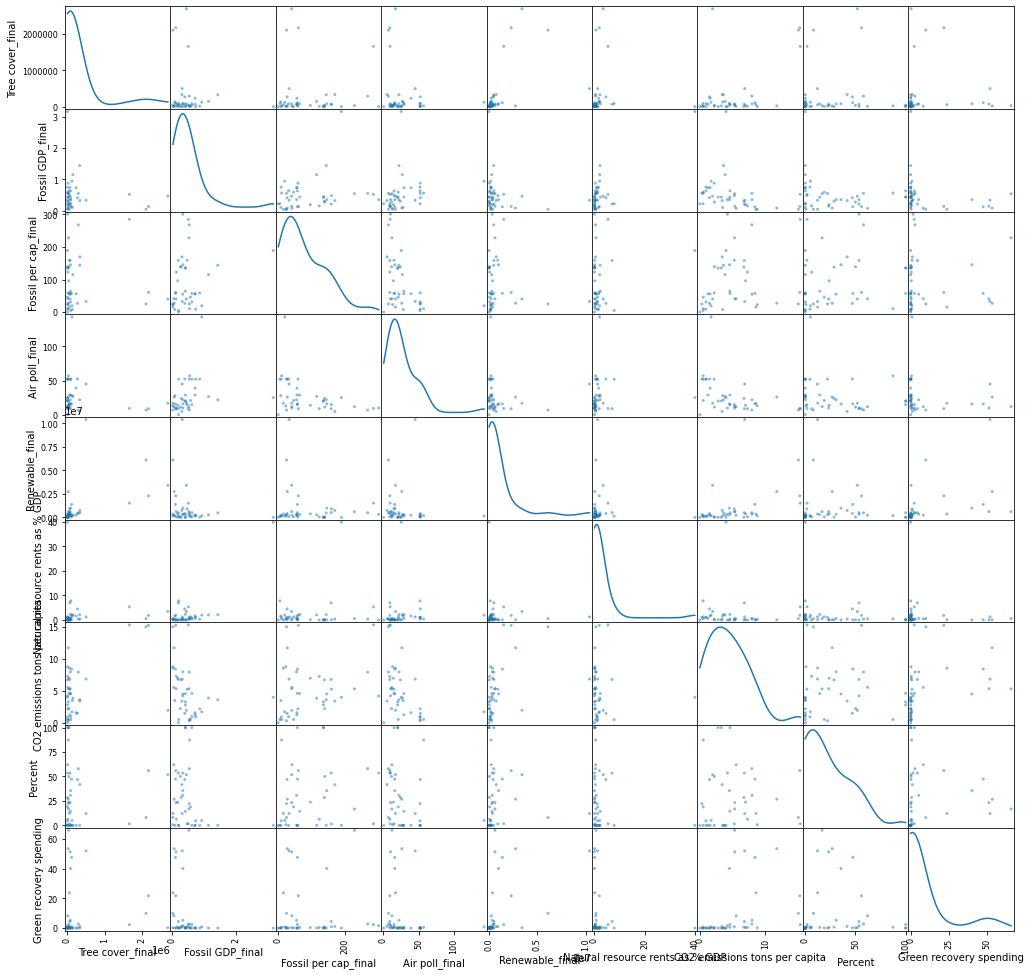

In [78]:
from pandas.plotting import scatter_matrix

scatter_matrix(GROfinal, alpha=0.5, figsize=(17, 17), diagonal='kde')

In [79]:
corr = GROfinal.corr(method='pearson')

<AxesSubplot:>

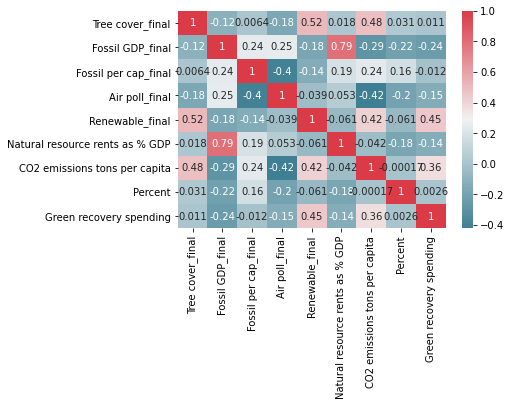

In [101]:
#remember this is after imputation
import matplotlib.pyplot as plt
import seaborn as sns

#colourmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, annot=True)

In [81]:
model.coef_

array([ 5.22483784e-06, -2.06706362e+01,  9.57247034e-02, -1.15478424e-01,
       -7.93173326e-07,  2.07322481e-01, -1.76111888e+00])

In [82]:
#line of best fit parameters access

model.intercept_

40.08540478326829

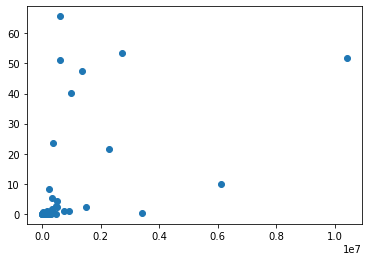

In [90]:
#ax = GROfinal.plot.scatter("Renewable_final", "Green recovery spending")
plt.scatter(GROfinal["Renewable_final"], GROfinal["Green recovery spending"])

In [91]:
model = LinearRegression(fit_intercept=True)

In [92]:
model.fit(GROfinal[['Renewable_final']], GROfinal['Green recovery spending'])

LinearRegression()

In [93]:
data = {'Vals': [GROfinal['Renewable_final'].min(), GROfinal['Renewable_final'].max()]}
xfit = pd.DataFrame(data, columns = ['Vals'])
#xfit = DataFrame([GROfinal['Renewable_final'].min(), GROfinal['Renewable_final'].max()])
ypred = model.predict(xfit)

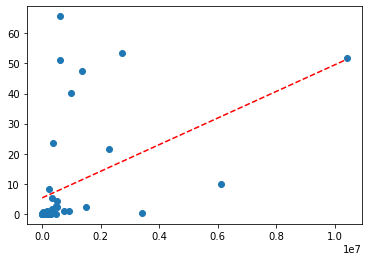

In [97]:
#ax.plot(xfit, ypred, linestyle="dashed")
plt.scatter(GROfinal["Renewable_final"], GROfinal["Green recovery spending"])
plt.plot(xfit, ypred, linestyle="dashed", color='red')
#limited linear correlation

In [99]:
GROfinal.shape

(43, 9)